In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 10

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    #consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(20, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

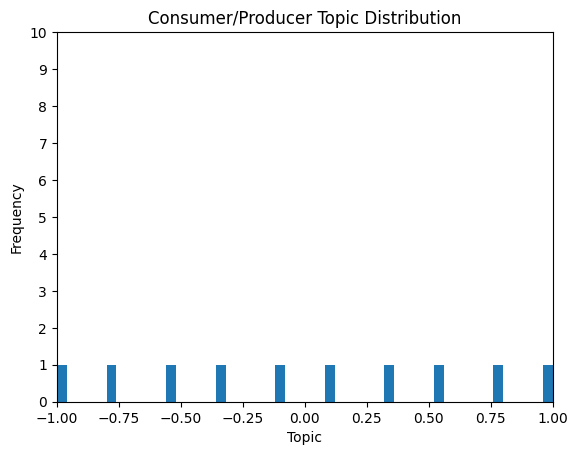

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

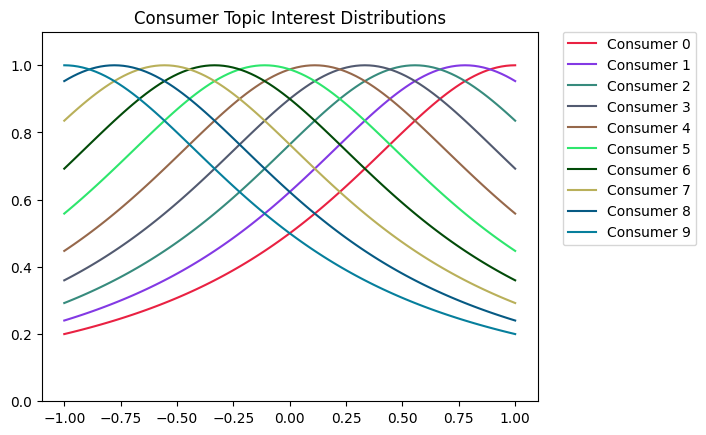

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

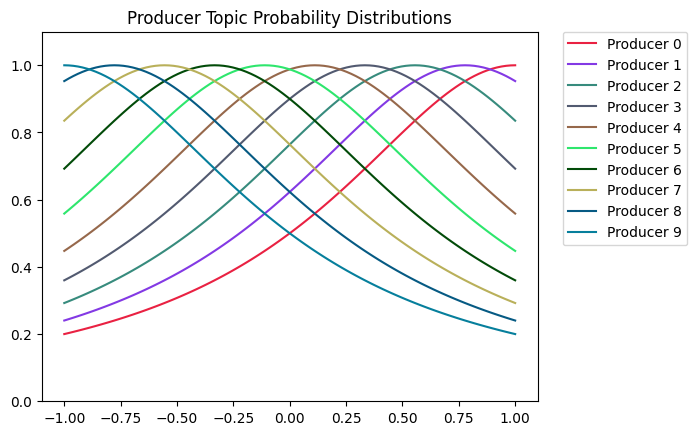

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100, topic_position='opposite')

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.38198062498122454s): nit=0, nfev=2, njev=1.
Optimizing producer 1
Optimization succeeded (overall 12.488991625024937s): nit=3, nfev=72, njev=36.
Optimizing producer 2
Optimization succeeded (overall 0.7367235830752179s): nit=1, nfev=4, njev=2.
Optimizing producer 3
Optimization failed: ABNORMAL_TERMINATION_IN_LNSRCH Retrying...
Optimization succeeded (overall 40.350020667072386s): nit=2, nfev=122, njev=61.
Optimizing producer 4
Optimization succeeded (overall 13.040306041017175s): nit=5, nfev=72, njev=36.
Optimizing producer 5
Optimization failed: ABNORMAL_TERMINATION_IN_LNSRCH Retrying...
Optimization succeeded (overall 37.14524670795072s): nit=1, nfev=44, njev=22.
Optimizing producer 6
Op

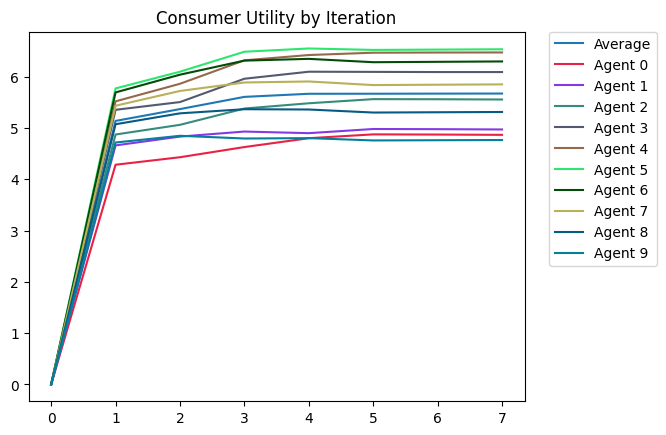

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

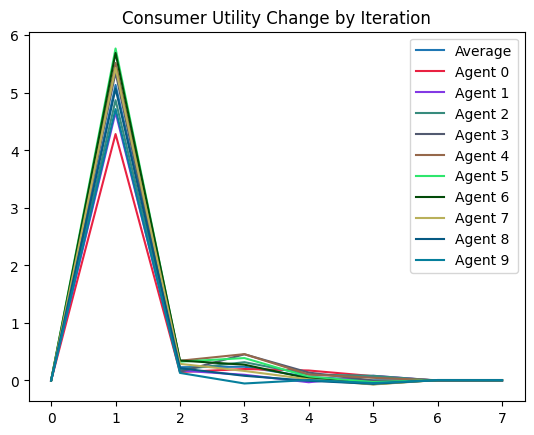

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

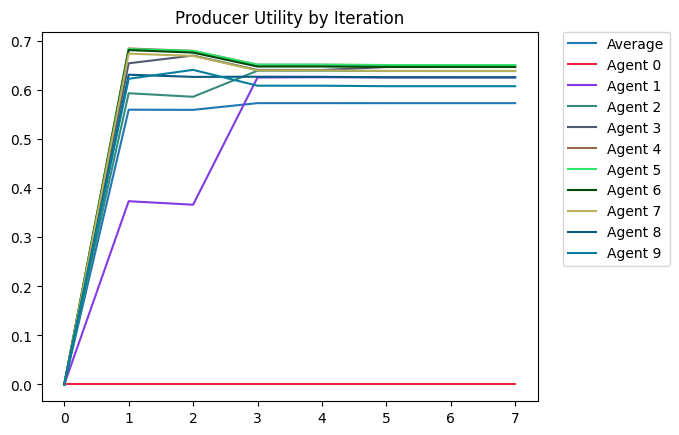

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

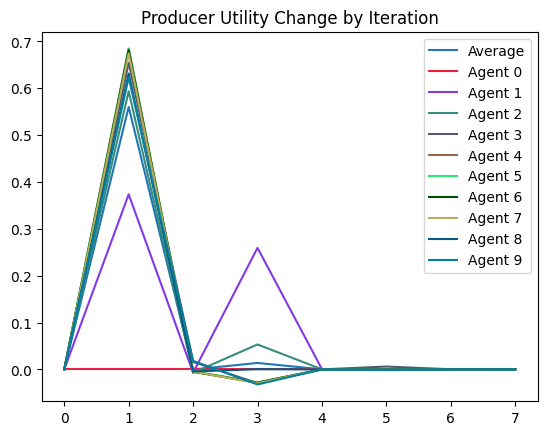

In [15]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

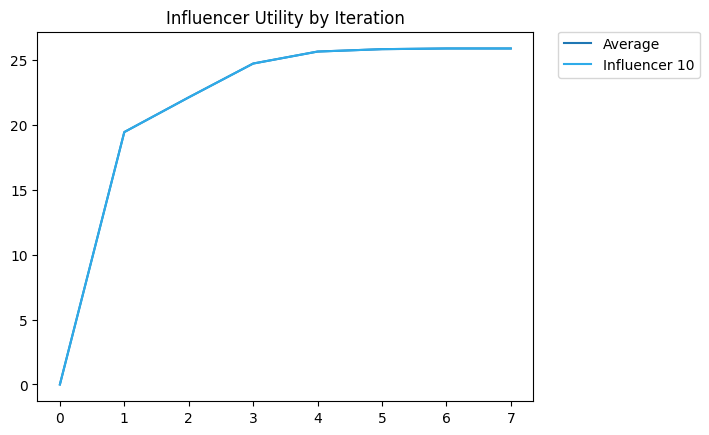

In [16]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

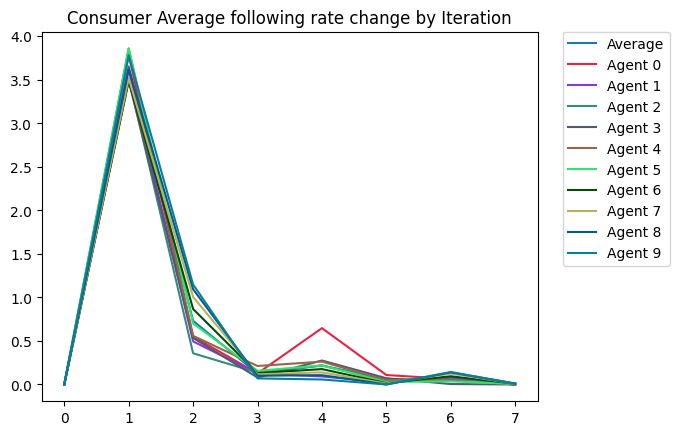

In [17]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

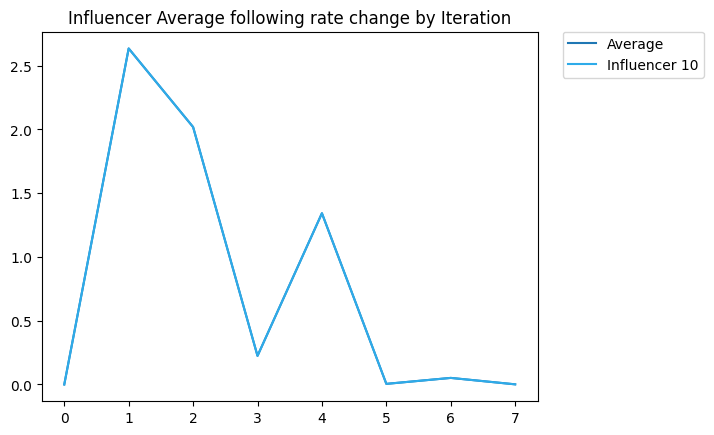

In [18]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

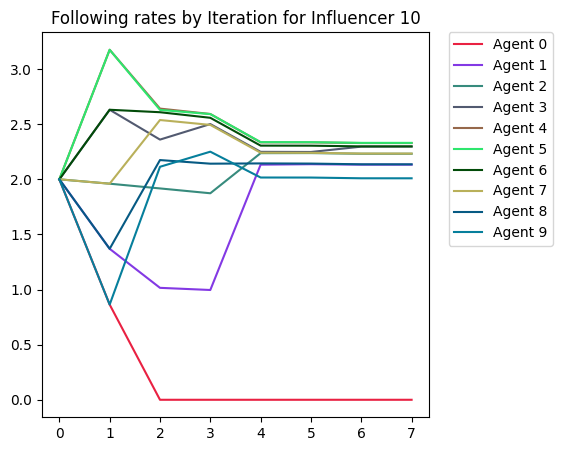

In [19]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

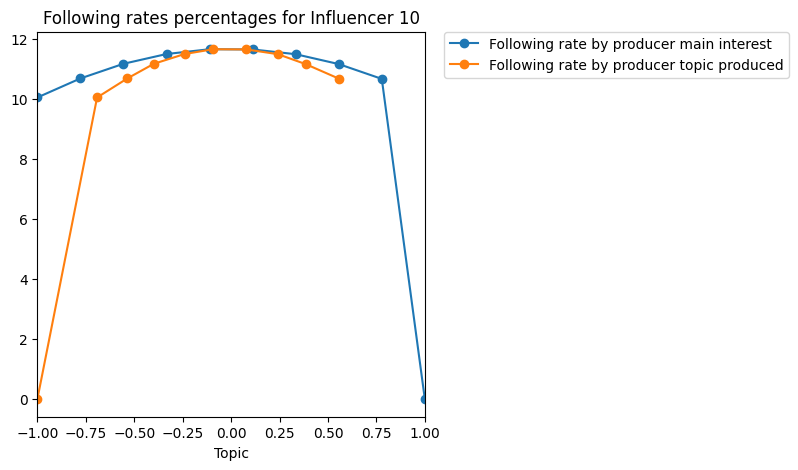

In [20]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

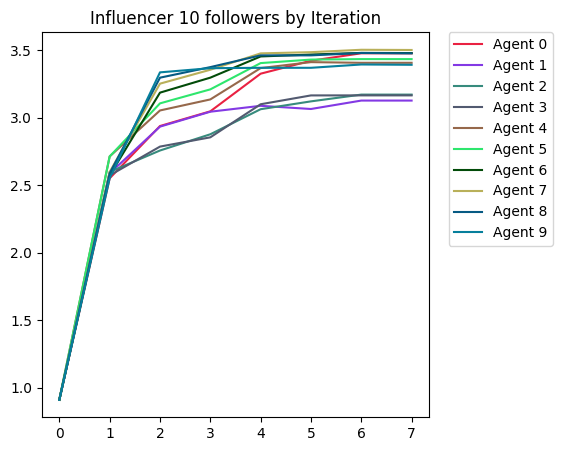

In [21]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

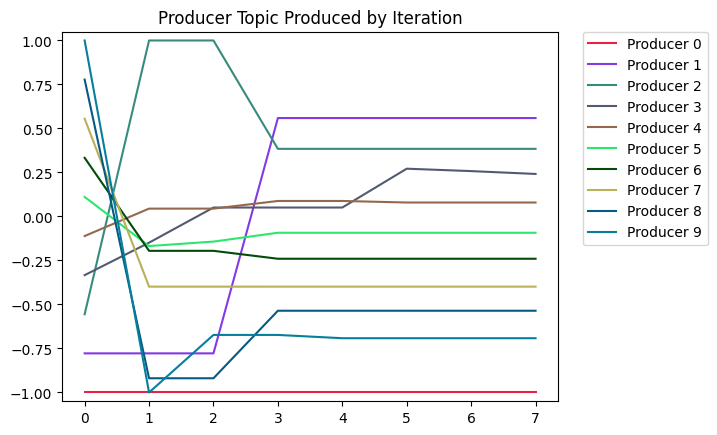

In [22]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

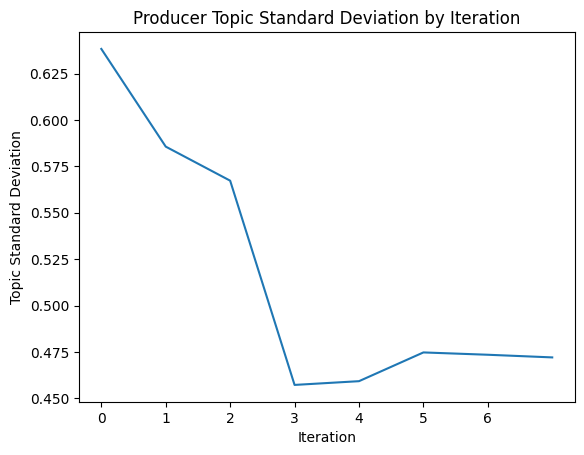

In [23]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

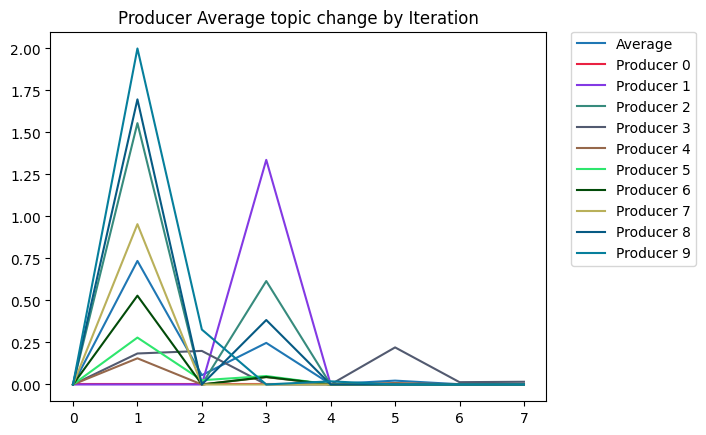

In [24]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

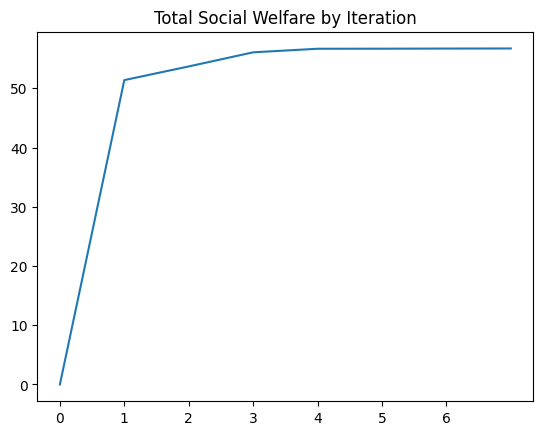

In [25]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

In [26]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

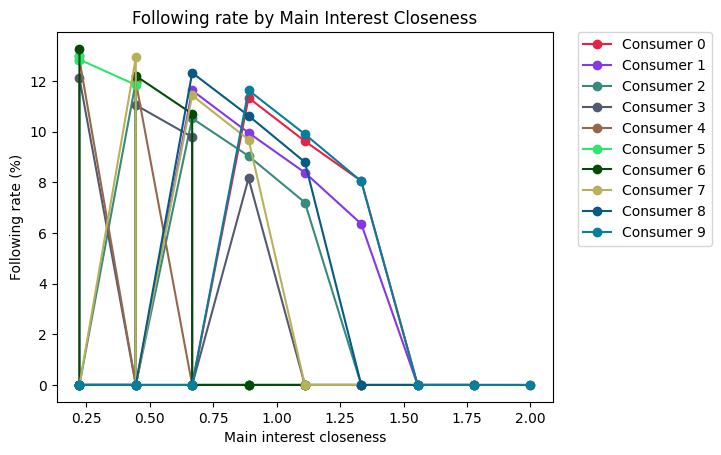

In [27]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

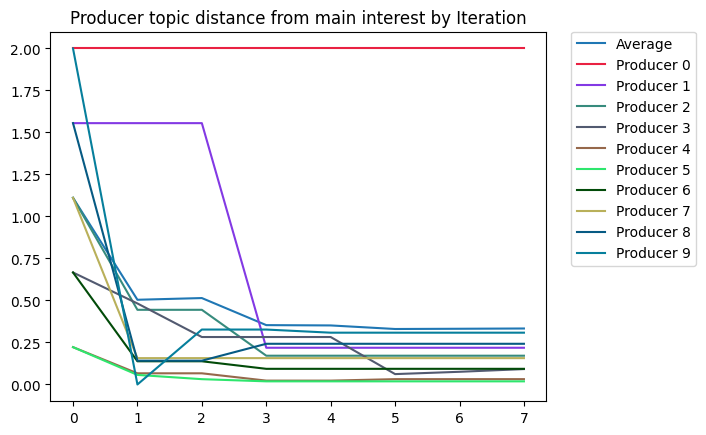

In [28]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

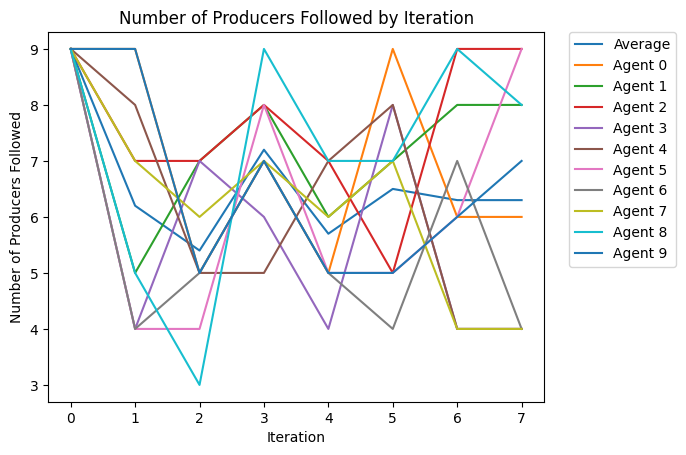

In [29]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[1.         0.27569821]
 [0.27569821 1.        ]]


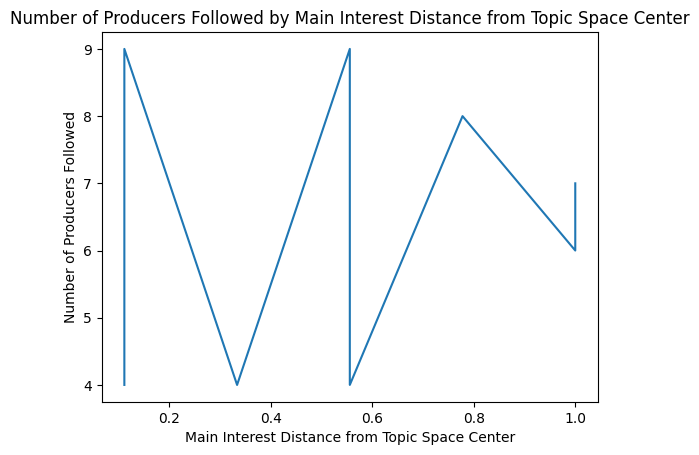

In [30]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

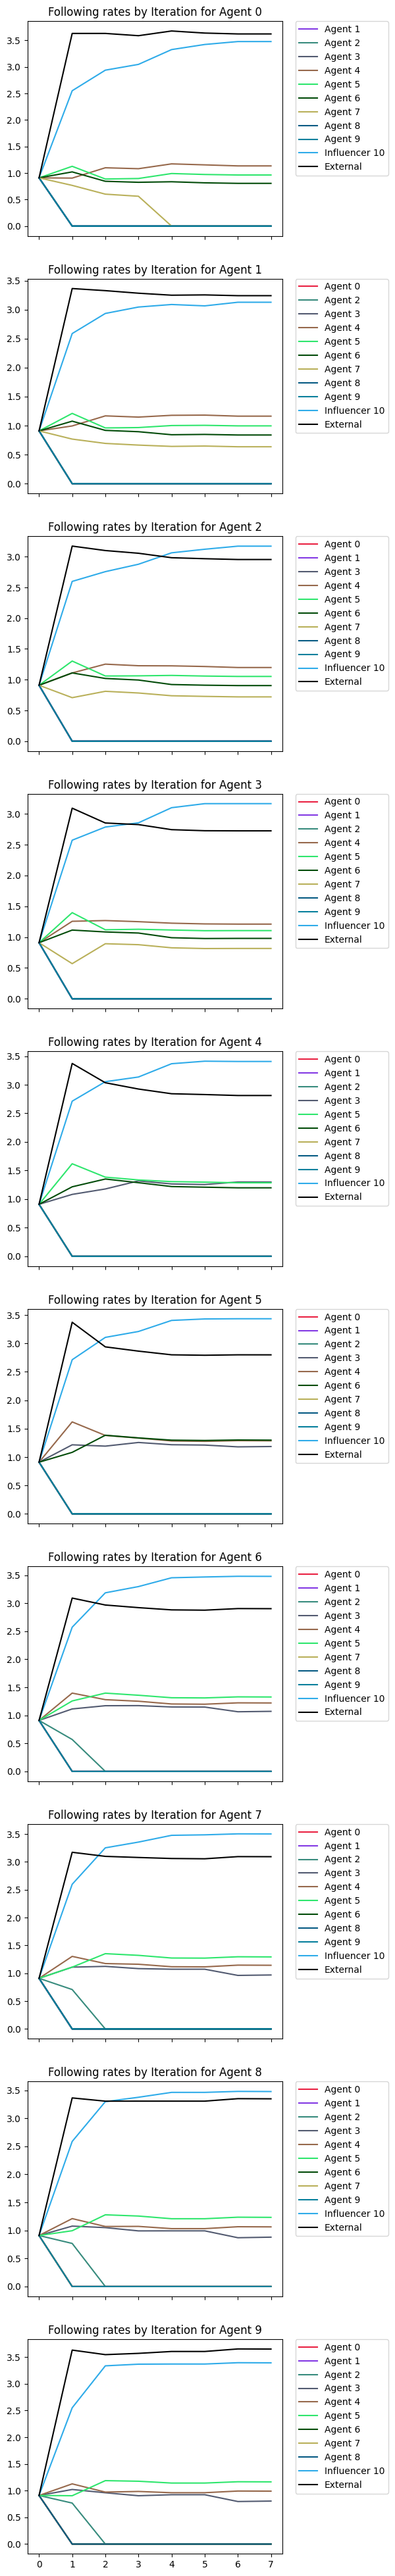

In [31]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [32]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

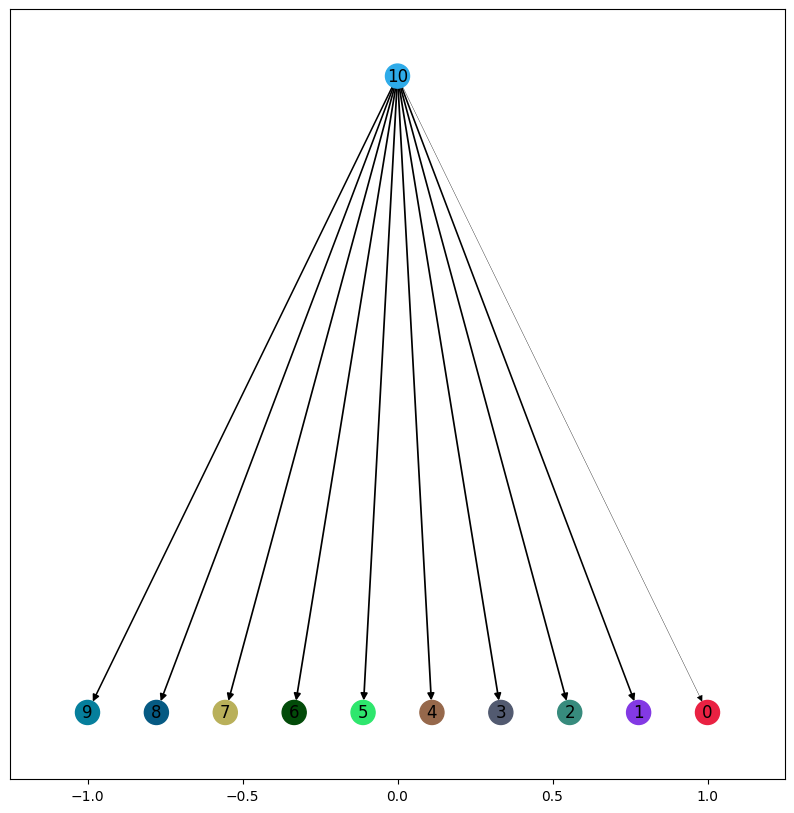

In [33]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

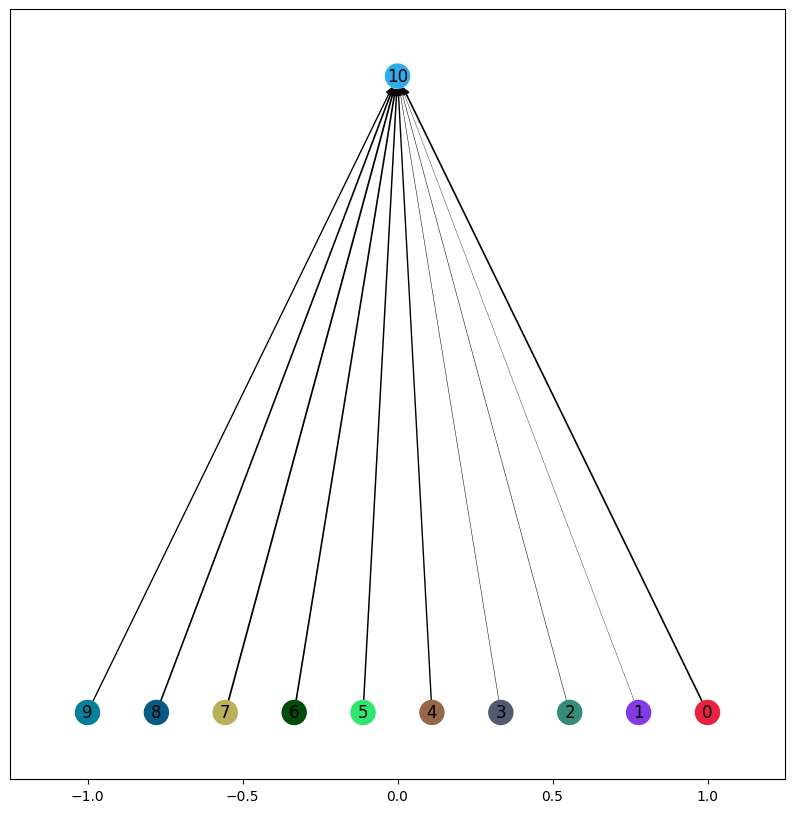

In [34]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

{0: (1.0, 0), 1: (0.7777777777777777, 0), 2: (0.5555555555555554, 0), 3: (0.33333333333333326, 0), 4: (0.11111111111111116, 0), 5: (-0.11111111111111116, 0), 6: (-0.33333333333333337, 0), 7: (-0.5555555555555556, 0), 8: (-0.7777777777777778, 0), 9: (-1.0, 0), 10: (0, 1), 'External': (1, 1)}


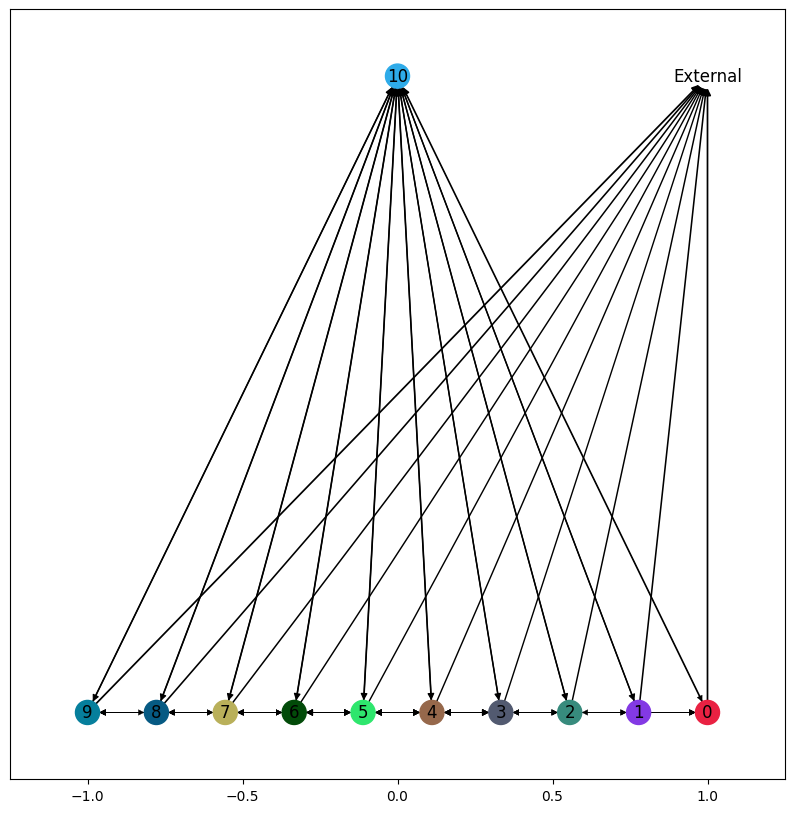

In [35]:
visualize.visualize_market(content_market, stats, agent_colors)

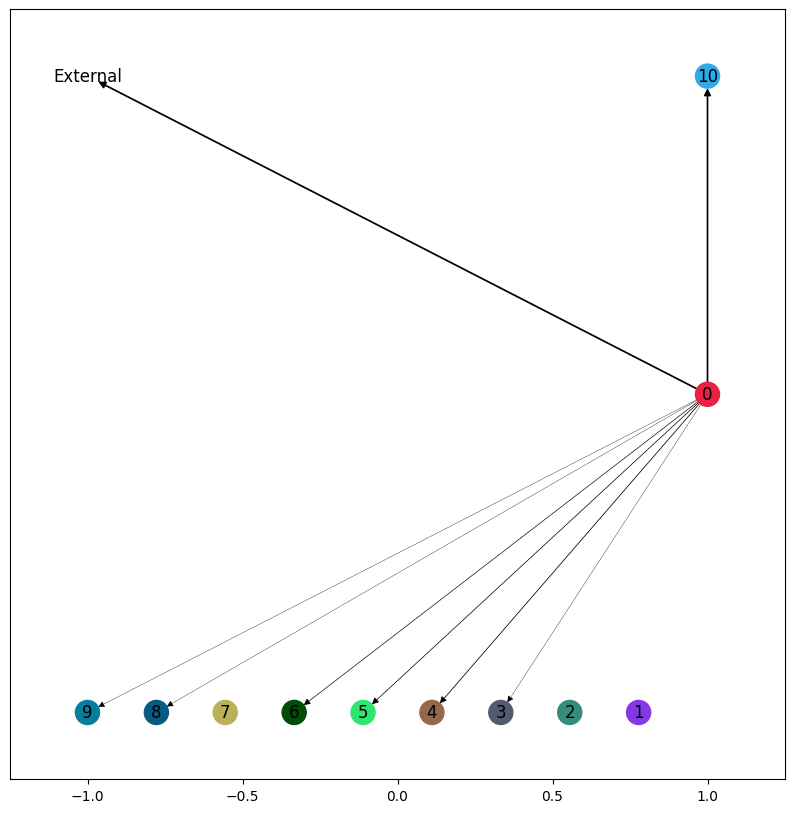

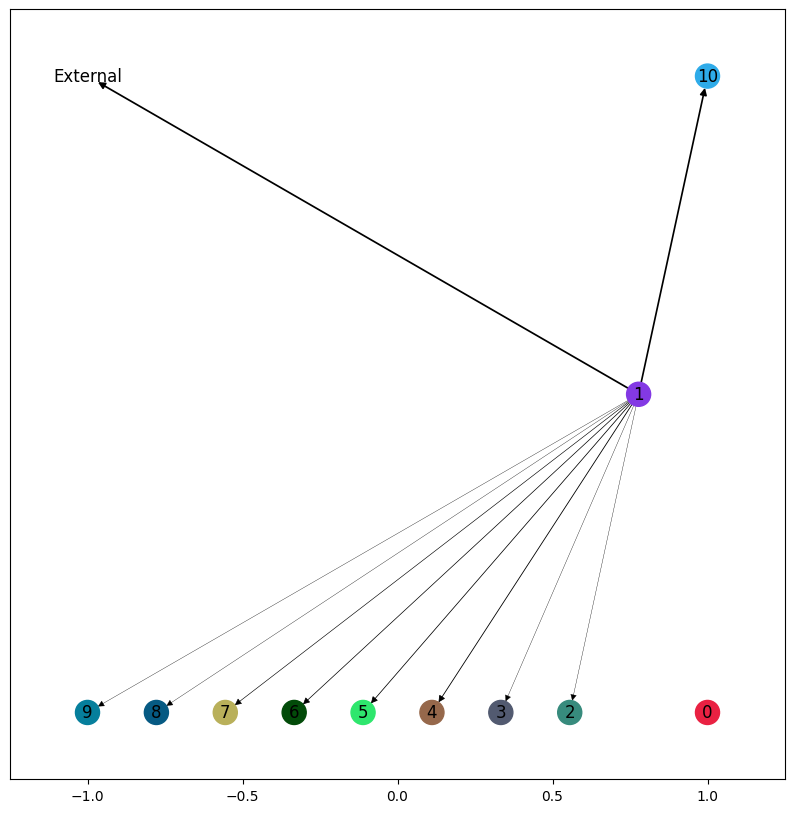

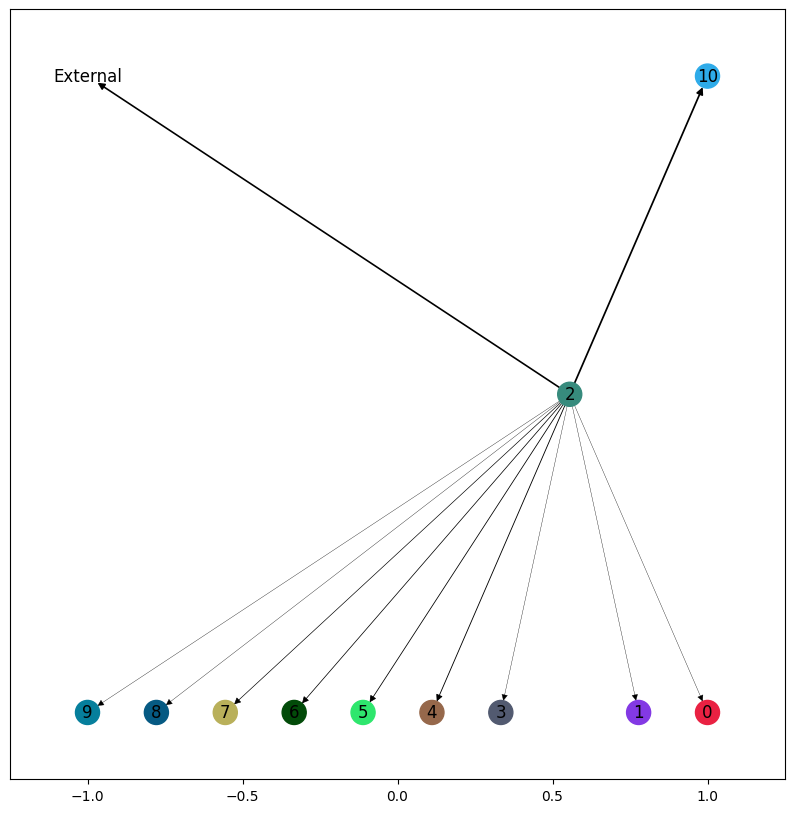

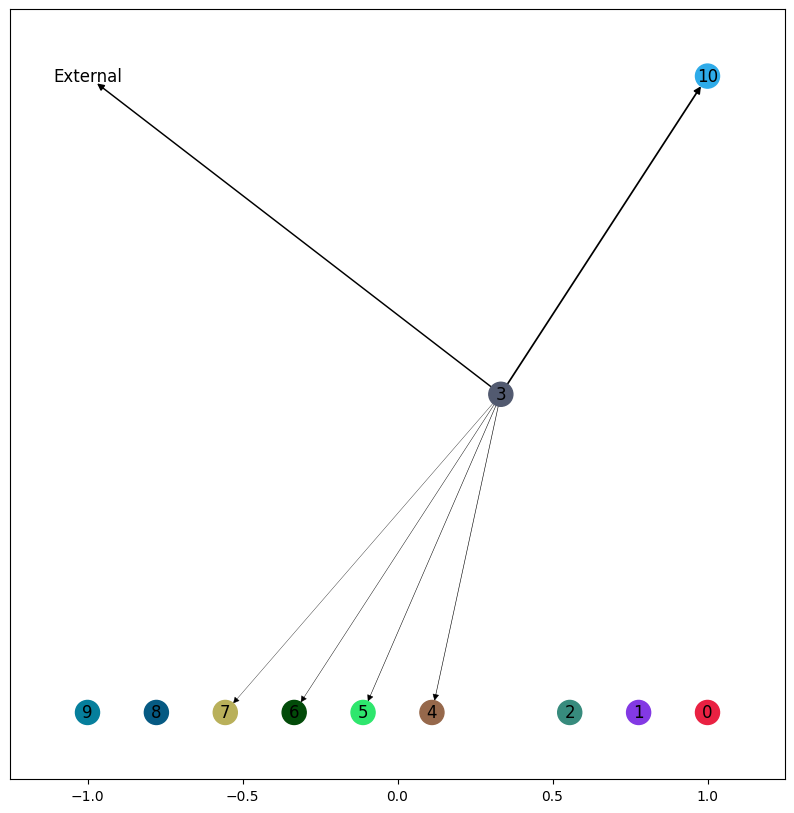

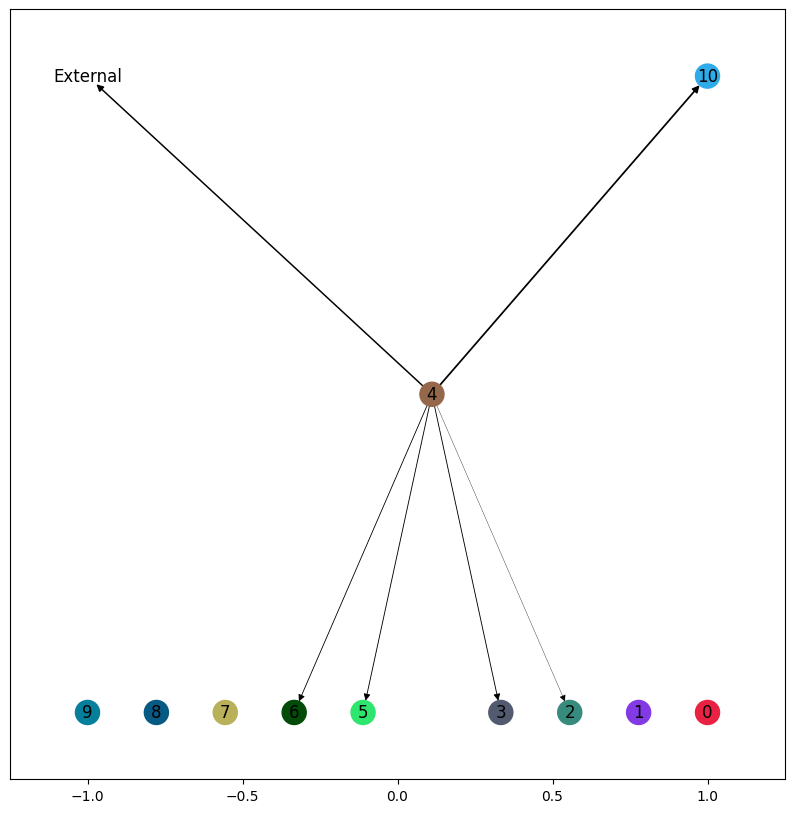

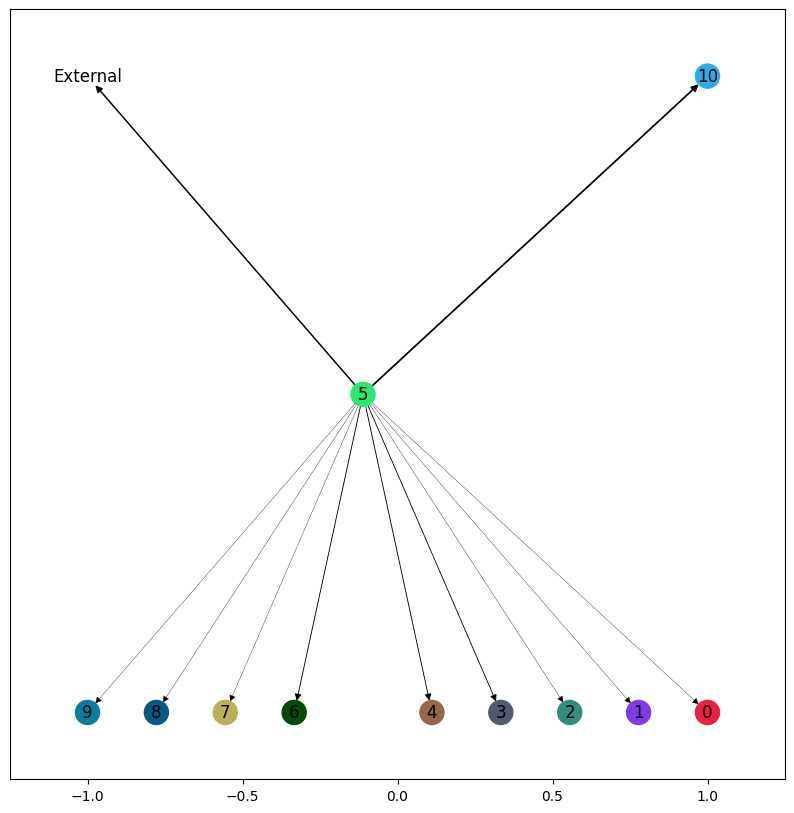

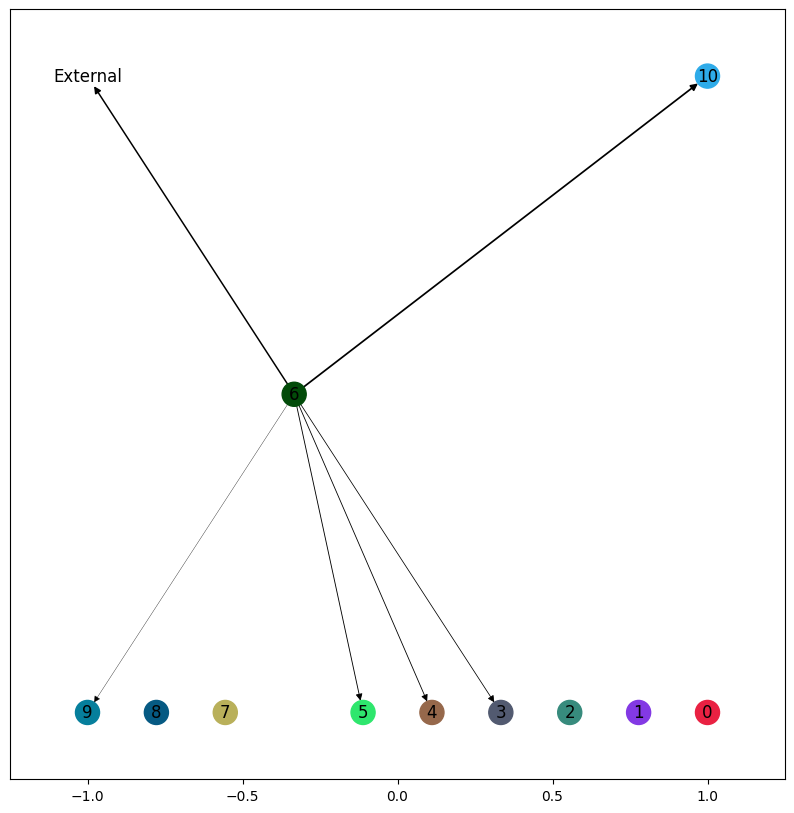

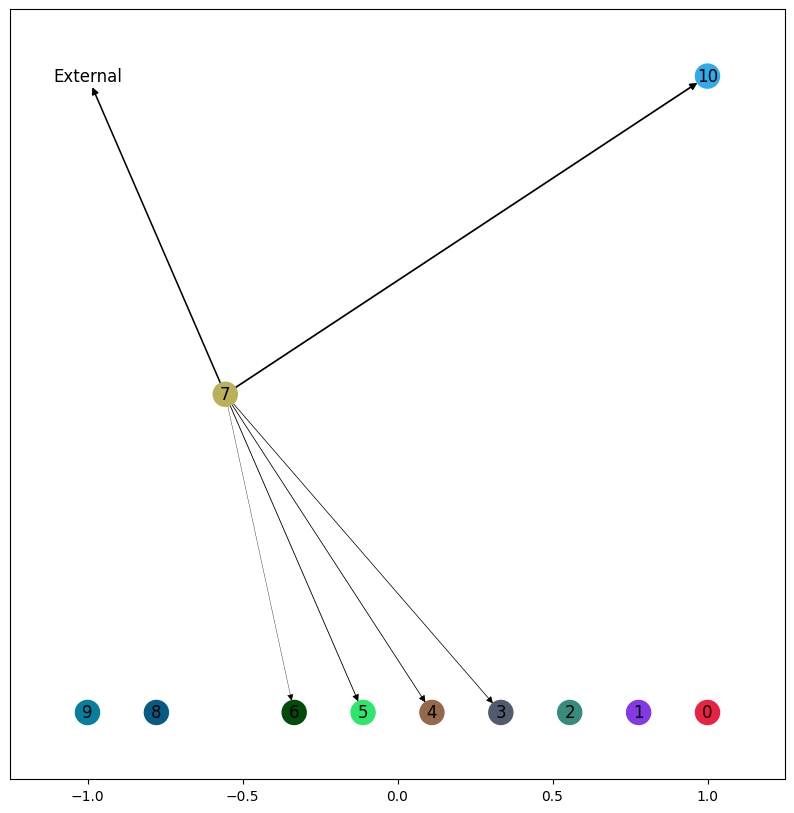

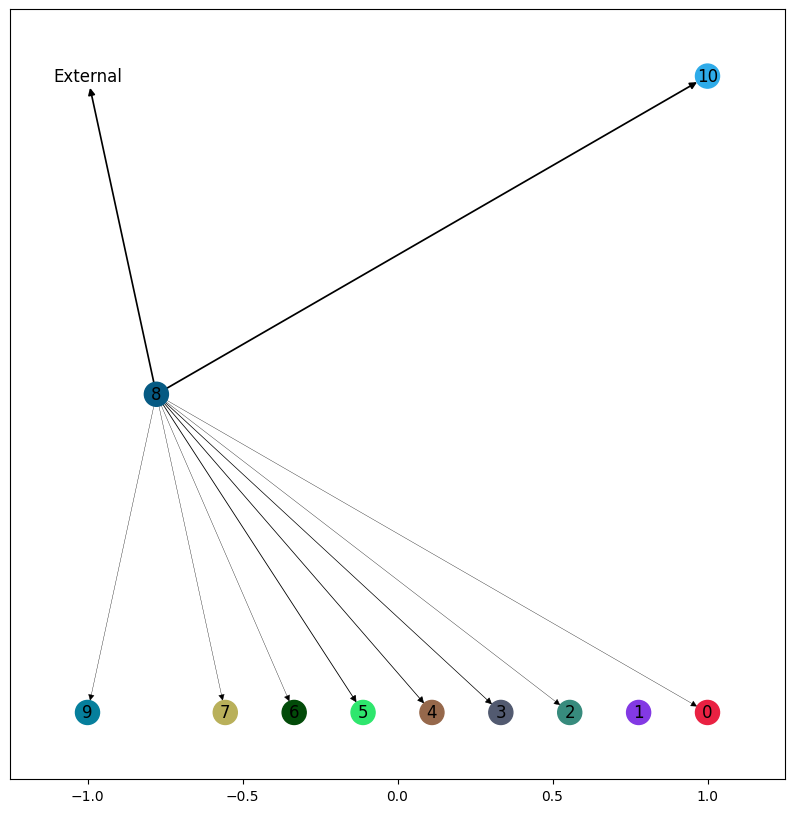

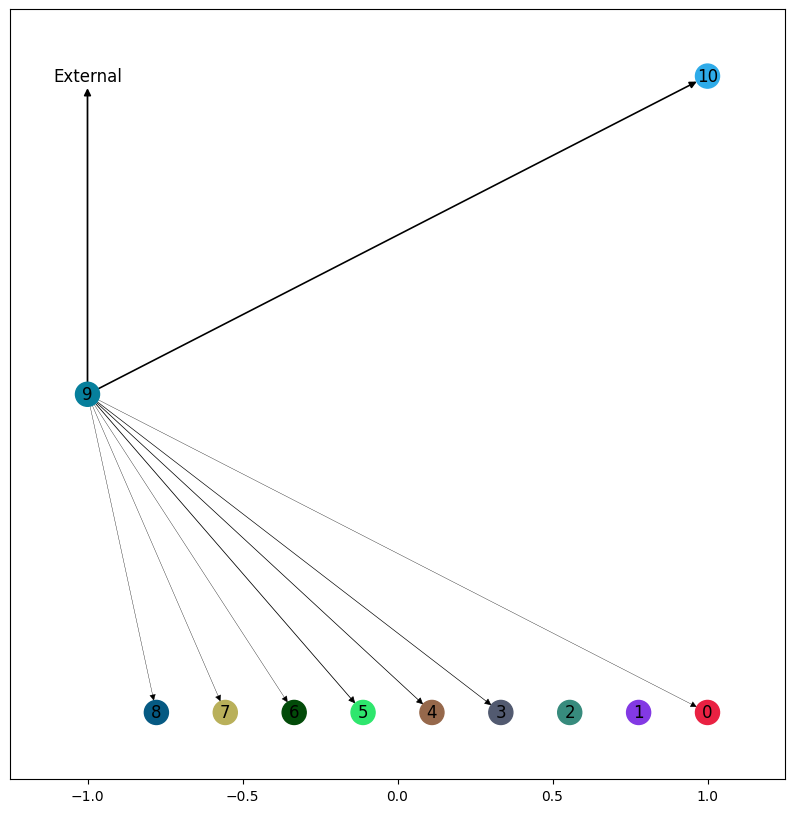

In [36]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

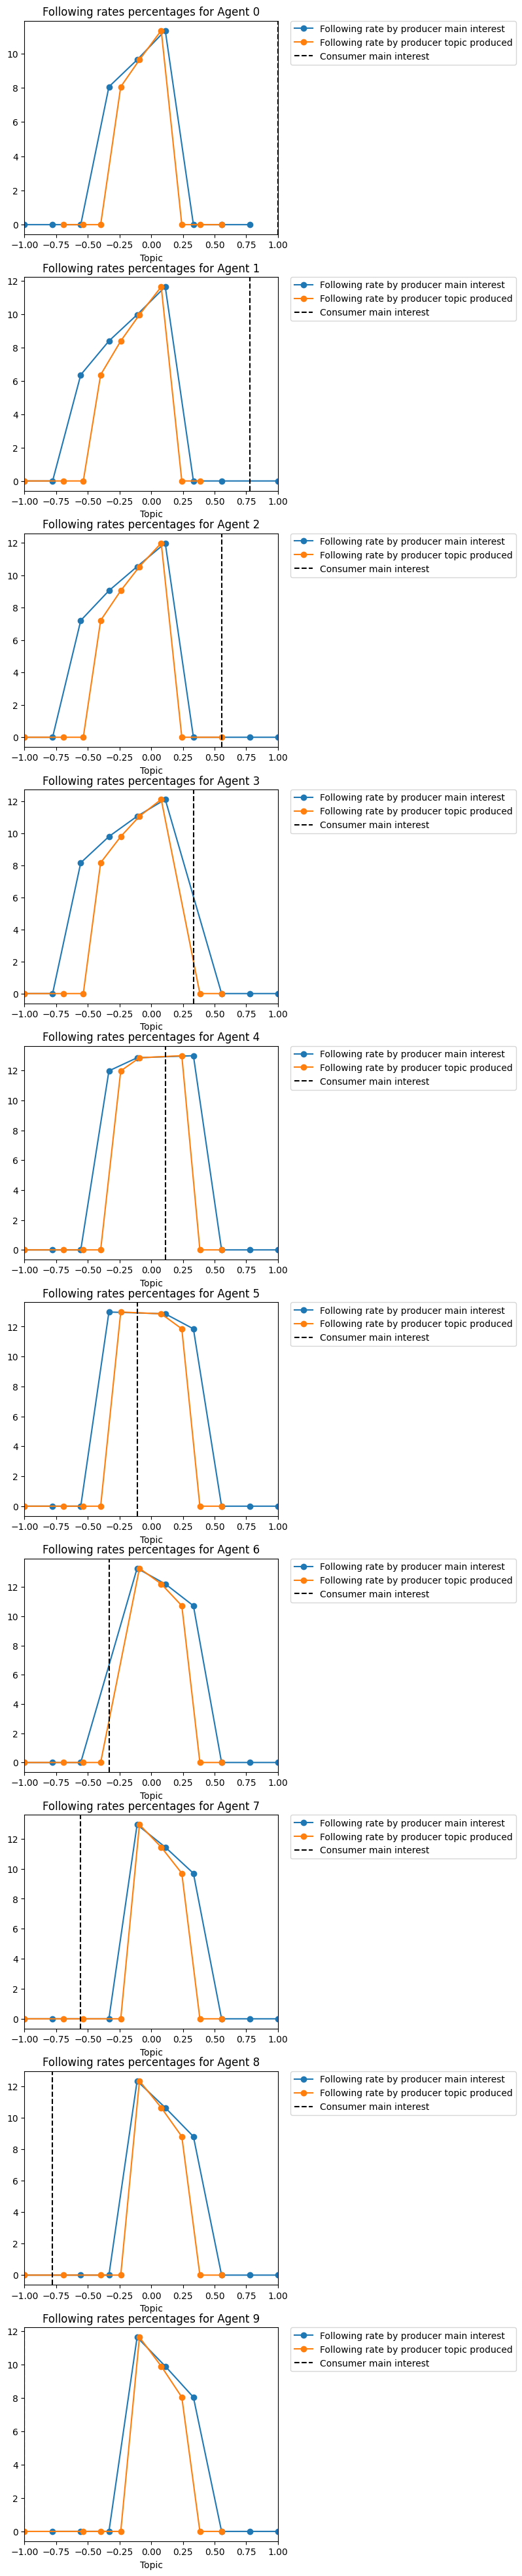

In [37]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [38]:
stats.to_dict()

{'num_iterations': 7,
 'total_consumer_utility': [0,
  51.382463867455016,
  53.68667877207959,
  56.06865818082665,
  56.6721760832337,
  56.681891116502584,
  56.7040914590981,
  56.71855223304102],
 'total_producer_utility': [0,
  5.600745905471801,
  5.597467045333726,
  5.734459730846964,
  5.734487672007319,
  5.734227359092333,
  5.734216682550938,
  5.734216682550938],
 'total_influencer_utility': [0,
  19.44302916604115,
  22.116124357738784,
  24.72095664256463,
  25.643956941412835,
  25.82864394051425,
  25.881730613883978,
  25.881272388618505],
 'total_social_welfare': [0,
  51.382463867455016,
  53.68667877207959,
  56.06865818082665,
  56.6721760832337,
  56.681891116502584,
  56.7040914590981,
  56.71855223304102],
 'average_consumer_rate_change': [0,
  3.6544439696562088,
  0.731368247577885,
  0.1255475048521948,
  0.21944707413938375,
  0.037547097163031416,
  0.07792446120783027,
  0.004430955108317533],
 'average_producer_topic_change': [0,
  0.735465043996028,
  

In [39]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.77777778]),
 array([-0.55555556]),
 array([-0.33333333]),
 array([-0.11111111]),
 array([0.11111111]),
 array([0.33333333]),
 array([0.55555556]),
 array([0.77777778]),
 array([1.])]